In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [79]:
%matplotlib inline
import re as re

In [80]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
full_data = [train, test]

In [81]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [82]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


> ### Preprocess - data works
1. Pclass

In [83]:
print(train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


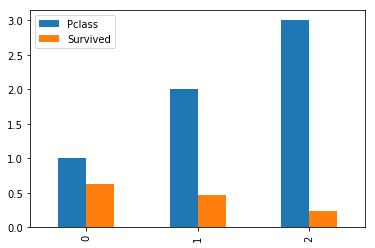

In [84]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().plot(kind='bar')

2. Name:  no direct correlation in name and survived. Extract title out of name to check the survive correlation

In [85]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [86]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir', 'Mr','Master'], 'Mr')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

  Title  Survived
0  Miss  0.702703
1    Mr  0.190311
2   Mrs  0.796875


In [87]:
for dataset in full_data:
    # Mapping titles
    title_mapping = {"Miss": 0, "Mr": 1,  "Mrs":2}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(1)

3. Sex

In [88]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male': 1})


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [90]:
print(train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean())

   Sex  Survived
0    0  0.742038
1    1  0.188908


4. Age 

In [91]:
for dataset in full_data:
    age_avg  = dataset['Age'].mean()
    age_std   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)

    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['Age_group'] = pd.cut(train['Age'],8)

print (train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean())

       Age_group  Survived
0  (-0.08, 10.0]  0.593750
1   (10.0, 20.0]  0.363057
2   (20.0, 30.0]  0.342657
3   (30.0, 40.0]  0.415094
4   (40.0, 50.0]  0.361111
5   (50.0, 60.0]  0.404762
6   (60.0, 70.0]  0.222222
7   (70.0, 80.0]  0.250000


C:\Users\Jia\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
for dataset in full_data:
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age']   = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']  = 4

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
Age_group      891 non-null category
dtypes: category(1), float64(1), int32(1), int64(7), object(4)
memory usage: 88.1+ KB


In [94]:
for dataset in full_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [95]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [96]:
for dataset in full_data:
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [97]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [98]:
for dataset in full_data:
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare']  = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [99]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,FamilySize,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,"(20.0, 30.0]",2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,2,"(30.0, 40.0]",2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,0,"(20.0, 30.0]",1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,2,"(30.0, 40.0]",2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,"(30.0, 40.0]",1,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",1,1,0,0,330877,1,NaN,2,1,"(20.0, 30.0]",1,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,17463,3,E46,0,1,"(50.0, 60.0]",1,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,349909,2,NaN,0,1,"(-0.08, 10.0]",5,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,347742,1,NaN,0,2,"(20.0, 30.0]",3,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,237736,2,NaN,1,2,"(10.0, 20.0]",2,"(14.454, 31.0]"


In [100]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [101]:
print(type(test))

<class 'pandas.core.frame.DataFrame'>


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId        891 non-null int64
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null int64
Age                891 non-null int32
SibSp              891 non-null int64
Parch              891 non-null int64
Ticket             891 non-null object
Fare               891 non-null int32
Cabin              204 non-null object
Embarked           891 non-null int32
Title              891 non-null int64
Age_group          891 non-null category
FamilySize         891 non-null int64
CategoricalFare    891 non-null category
dtypes: category(2), int32(3), int64(8), object(3)
memory usage: 89.0+ KB


In [103]:
# Feature Selection
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp',\
                 'Parch', 'FamilySize']
train  = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [104]:
train = train.drop(['PassengerId','Age_group', 'CategoricalFare'], axis =1)

In [105]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(801, 6)
(891,)
(90, 6)


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [107]:
X_train = train.iloc[0::, 1::]
Y_train = train.iloc[0::, 0]
X_test = train.iloc[0::, 1::]
# Logistic Regression
logreg = LogisticRegression() #(C=0.1, penalty='l1', tol=1e-6)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

result_train = logreg.score(X_train, Y_train)
result_val = cross_val_score(logreg,X_train, Y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))



taring score = 0.7912457912457912 , while validation score = 0.7833756237616529


C:\Users\Jia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [126]:
X_train = train.iloc[0::, 1::]
Y_train = train.iloc[0::, 0]
X_test = train.iloc[0::, 1::]
#svc = SVC(gamma='scale')
svc= SVC(gamma=2, C=1)
#svc = SVC(C = 0.1, gamma=0.1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

result_train = svc.score(X_train, Y_train)
result_val = cross_val_score(svc,X_train, Y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.8496071829405163 , while validation score = 0.7980457034520693


In [119]:
X_train = train.iloc[0::, 1::]
Y_train = train.iloc[0::, 0]
X_test = test.iloc[0::, 1::]
random_forest = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

seed= 42
random_forest =RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, 
                           n_jobs=1, random_state=seed,verbose=0)

random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

result_train = random_forest.score(X_train, Y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()

print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.8271604938271605 , while validation score = 0.8036196705637696


In [110]:
X_train = train.iloc[0::, 1::]
y_train = train.iloc[0::, 0]
X_test = test.iloc[0::, 1::]
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
result_train = clf.score(X_train, y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.7934904601571269 , while validation score = 0.8036196705637696


In [111]:
X_train = train.iloc[0::, 1::]
y_train = train.iloc[0::, 0]
X_test = test.iloc[0::, 1::]
clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False,
                              store_covariances=None, tol=0.0001).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
result_train = clf.score(X_train, y_train)
result_val = cross_val_score(random_forest,X_train, Y_train, cv=5).mean()
print('taring score = %s , while validation score = %s' %(result_train , result_val))

taring score = 0.8035914702581369 , while validation score = 0.8036196705637696


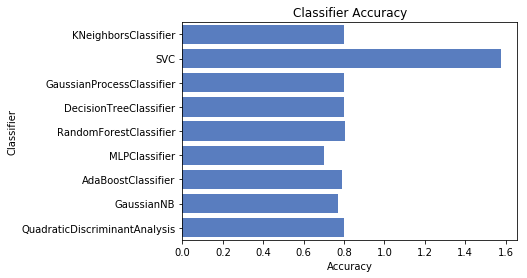

In [112]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
log_cols = ["Classifier", "Accuracy"]
log  = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train.iloc[0::, 1::]
y = train.iloc[0::, 0]
#X_test = test.iloc[0::, 1::]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)

        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [128]:
X_train = train.iloc[0::, 1::]
y_train = train.iloc[0::, 0]
X_test = test.iloc[0::, 1::]
candidate_classifier =  SVC(gamma=2, C=1)
candidate_classifier.fit(X_train, y_train)
result = candidate_classifier.predict(X_test)

In [131]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": result
    })
submission.to_csv('titanic3.csv', index=False)
print('Exported')

Exported


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null int32
Title          418 non-null float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 18.0 KB


In [62]:
print(len(Y_pred))

418


In [63]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic2.csv', index=False)
print('Exported')

Exported
